# Design a Tmaze with 5 observations so that empowerment captures the reduction of overlapping actions. 
### Observation = [ Nothing, Cheese, Shock, Right(Cue), Left(Cue)]
### Action = [ Center, Right, Left, Cue ] 
## We start with the classical TRAP scenario where the mouse cant leave once it goes right or left. We will then work in a scenario where this does not happen. I will claim that Right and Left actions will also become informative.



# The hypothesis is that Empowerment increases after taking an action that maximizes information gain

### 1. Compute Empowerment at $t_1$ as $\underset{p(a_1)}{max} \ I (a_1, o_2)$

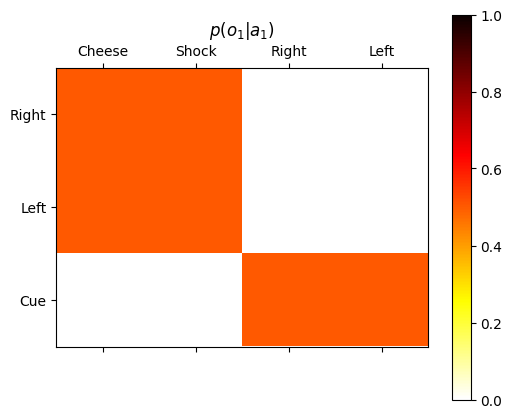

In [ ]:
# Define conditional p(o_2 | a_1)
import numpy as np
import utils_full as u

o_n = 4  # Example number of outcomes for o_2
oLabels = ["Cheese", "Shock", "Right", "Left"]

a1_n = 3  # Example number of actions for a_1
a1Labels = ["Right", "Left", "Cue"]

p_o2_given_a1 = np.array([
    [ 0.5, 0.5, 0, 0],
    [ 0.5, 0.5, 0, 0],
    [ 0, 0, 0.5, 0.5],
])
u.plot_distribution(p_o2_given_a1, title="$p(o_2 | a_1)$", x_labels=oLabels, y_labels=a1Labels)

In [ ]:
import torch as t
p_a1, empowerment_a1o2 = u.compute_empowerment(t.tensor(p_o2_given_a1), base=2)  # specify base=2 
print("Empowerment t_1 :", np.round(empowerment_a1o2, 4), "bits ")
print("Optimal p(a_1):", p_a1.numpy())

Empowerment t_1 : 0.9183 bits 
Optimal p(a_1): [0.3333 0.3333 0.3333]


#### Empowerment is 1.5 bits at $t_1$. Right and Left are identical actions in the sense that the expected observations are the same. This is why the mouse is not maximally empowered. These actions are in fact different, just that the mouse does not know any better right now. 

### 2. Compute information gain for $a_1$ as $I(s_2;o_2|a_1)$ = $H[p(o_2|a_1)]$ - $E_{p(s_2|a_1)}H[p(o_2|s_1)]$

In [ ]:
def mi(o_given_a, s_given_a, o_given_s):
    H_o_given_a = u.shannon_entropy(o_given_a,axis=1)
    
    
    
mi(p_o2_given_a1)

TypeError: mi() missing 2 required positional arguments: 's_given_a' and 'o_given_s'

### 3. Compute Empowerment at $t_2$ for each $a_1$

#### 3.1 For $a_1$ = Center:
#### The Empowerment does not change as the agent has not actually moved.

#### 3.2 For $a_1$ = Right and $o_2$ = Cheese:
#### (works analogously if $a_1$ = Left or $o_2$ = Shock)

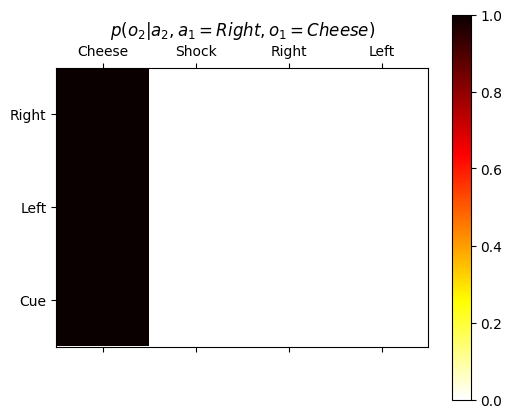

In [ ]:
# Define conditional p(o_2 | a_2, a_1=Right)

p_o3_given_a2_right = np.array([
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [ 1, 0, 0, 0],
])
u.plot_distribution(p_o3_given_a2_right, title="$p(o_2 | a_2, a_1 = Right, o_1 = Cheese)$", x_labels=oLabels, y_labels=a1Labels)

In [ ]:
_a1, empowerment_right = u.compute_empowerment(t.tensor(p_o3_given_a2_right), base=2)  # specify base=2 
print("Empowerment t_2 :", np.round(empowerment_right, 4), "bits ")
print("Optimal p(a_2):", p_a1.numpy())

Converged in 0 iterations.
Empowerment t_2 : -0.0 bits 
Optimal p(a_2): [0.25 0.25 0.25 0.25]


In [ ]:
_a1, empowerment_right = u.compute_empowerment(t.tensor(p_o3_given_a2_right), base=2)  # specify base=2 
print("Empowerment t_2 :", np.round(empowerment_right, 4), "bits ")
print("Optimal p(a_2):", p_a1.numpy())

Converged in 0 iterations.
Empowerment t_2 : -0.0 bits 
Optimal p(a_2): [0.25 0.25 0.25 0.25]


#### The mouse has 0 empowerment after entering a trap. all its actions are redundant.

### 3.3 $a_1$ = Cue and $o_2$ = Right:
### (analogous for $o_2$ = Left)

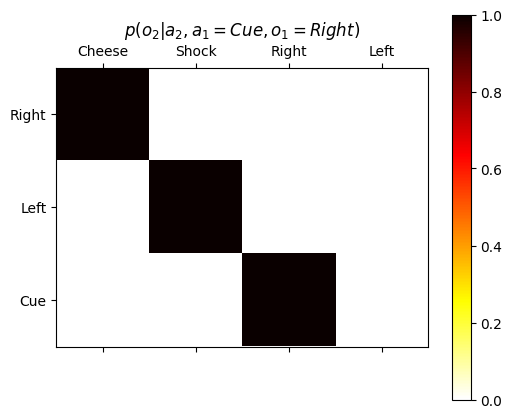

In [ ]:
# Define conditional p(o_3 | a_2, a_1=Cue, o_2 = Right)

p_o3_given_a2_cue = np.array([
    [ 1, 0, 0, 0],
    [ 0, 1, 0, 0],
    [ 0, 0, 1, 0],
])
u.plot_distribution(p_o3_given_a2_cue, title="$p(o_2 | a_2, a_1 = Cue, o_1 = Right)$", x_labels=o2Labels, y_labels=a1Labels)

In [ ]:
_a1, empowerment_cue = u.compute_empowerment(t.tensor(p_o3_given_a2_cue), base=2)  # specify base=2 
print("Empowerment t_2 :", np.round(empowerment_cue, 4), "bits ")
print("Optimal p(a_2):", p_a1.numpy())

Converged in 0 iterations.
Empowerment t_2 : 2.0 bits 
Optimal p(a_2): [0.25 0.25 0.25 0.25]


#### Empowerment has increased from 1.5 to 2 bits when going to the cue. This is because the redundant actions of Right and Left have been discriminated  . The mouse is even maximally empowered as each of its 4 actions is unique and non overlapping.

# NO TRAP SCENARIO

### We are going to repeat the measurements performed above for this alternative scenario to show that Right and Left become informative when these states are empowered enough. The reason why traps are uninformative is that information gain is the detection of correlation between two states. If one of those states is inaccesible (because one is stuck) then it ceases to be informative. THe two states are Cheese/Shock and the Cue. If the mouse can only visit one, it cant see the correlation between them. If it can access both freely ( as we will show now) they are both informative

# The hypothesis here is that Right and Left actions are informative when they are not traps. 

### This will also lead the mouse to become empowered when it takes them. It gains the same amount of information as going to the Cue, 1 bit. As it has reduced its uncertainty (entropy) over the Cheese and Shock states by 1 bit.

### 1. Compute Empowerment at $t_1$ as $\underset{p(a_1)}{max} \ I (a_1, o_2)$

In [ ]:
# Define conditional p(o_2 | a_1)

p_o2_given_a1 = np.array([
    [ 0.5, 0.5, 0, 0],
    [ 0.5, 0.5, 0, 0],
    [ 0, 0, 0.5, 0.5],
])
u.plot_distribution(p_o2_given_a1, title="$p(o_2 | a_1)$", x_labels=oLabels, y_labels=a1Labels)

NameError: name 'np' is not defined

In [ ]:
import torch as t
p_a1, empowerment_a1o2 = u.compute_empowerment(t.tensor(p_o2_given_a1), base=2)  # specify base=2 
print("Empowerment t_1 :", np.round(empowerment_a1o2, 4), "bits ")
print("Optimal p(a_1):", p_a1.numpy())

Empowerment t_1 : 1.5 bits 
Optimal p(a_1): [0.25 0.25 0.25 0.25]


# The expected observations dont change. The only thing that changes is the expected observations after going Right or Left and therefore the information and empowerment to be gained from these actions.

### 3. Compute Empowerment at $t_2$ for $a_1$ = Right and $o_2$ = Cheese:
#### (works analogously if $a_1$ = Left or $o_2$ = Shock)

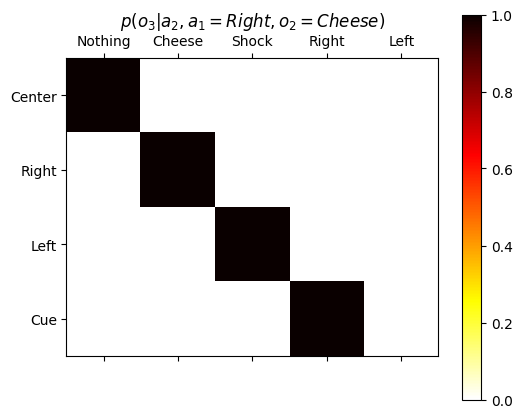

In [ ]:
# Define conditional p(o_3 | a_2, a_1=Right, o_2 = Cheese)

p_o3_given_a2_right = np.array([
    [ 1, 0, 0, 0],
    [ 0, 1, 0, 0],
    [ 0, 0, 1, 0],
])
u.plot_distribution(p_o3_given_a2_right, title="$p(o_3 | a_2, a_1 = Right, o_2 = Cheese)$", x_labels=oLabels, y_labels=a1Labels)

# Writing the beliefs down is easy enough. To support these claims I will train tensor nets to structure learn hidden states. Hopefully they will be identical to the ones stipulated here. 